In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('taker_buy_quote_volume') / pl.col('quote_volume')).alias('taker_buy_ratio'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

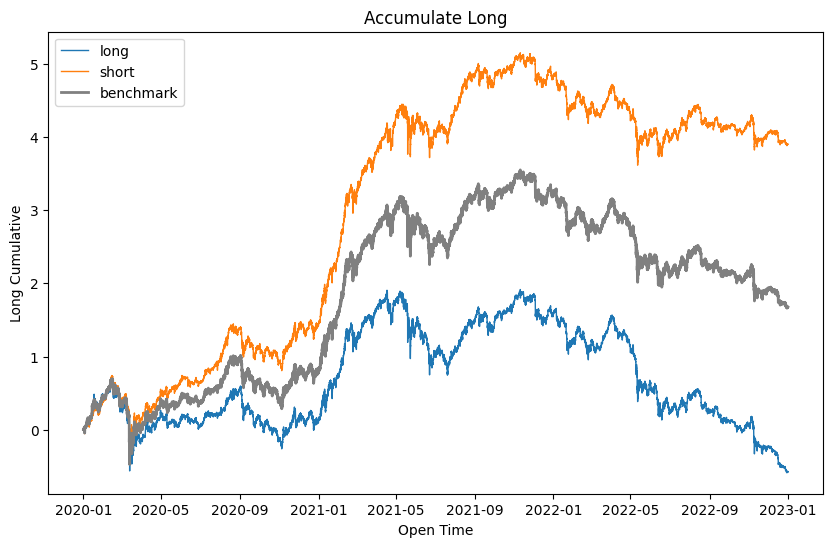

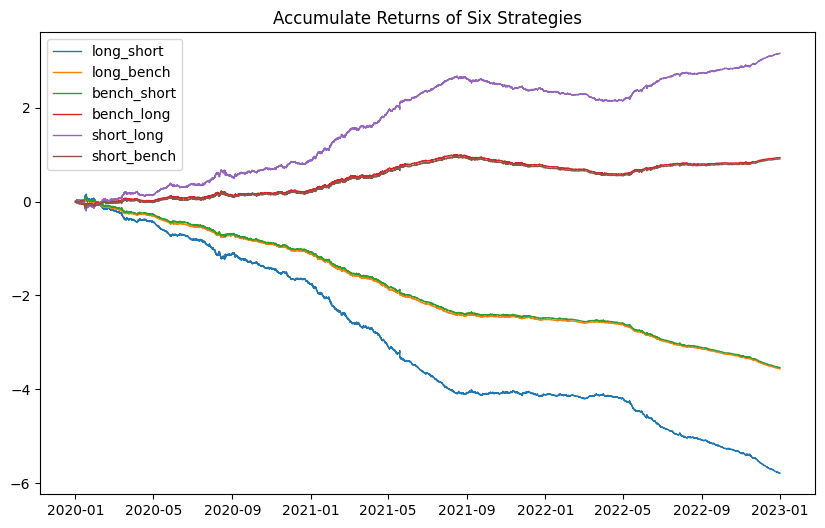

long: 
ann_return = -0.192  sharpe = -0.1767  maxdd = 0.8577  calmar_ratio = -0.2238  

short: 
ann_return = 1.2981  sharpe = 1.1774  maxdd = 0.6639  calmar_ratio = 1.9553  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.9281  sharpe = -7.3544  maxdd = 5.1255  calmar_ratio = -0.3762  

long_bench: 
ann_return = -1.1875  sharpe = -8.9931  maxdd = 3.4409  calmar_ratio = -0.3451  

bench_long: 
ann_return = 0.3115  sharpe = 2.359  maxdd = 0.2137  calmar_ratio = 1.4575  

short_long: 
ann_return = 1.0521  sharpe = 4.013  maxdd = 0.2311  calmar_ratio = 4.5529  

short_bench: 
ann_return = 0.3026  sharpe = 2.2931  maxdd = 0.212  calmar_ratio = 1.4273  

bench_short: 
ann_return = -1.1786  sharpe = -8.9311  maxdd = 3.3292  calmar_ratio = -0.354  



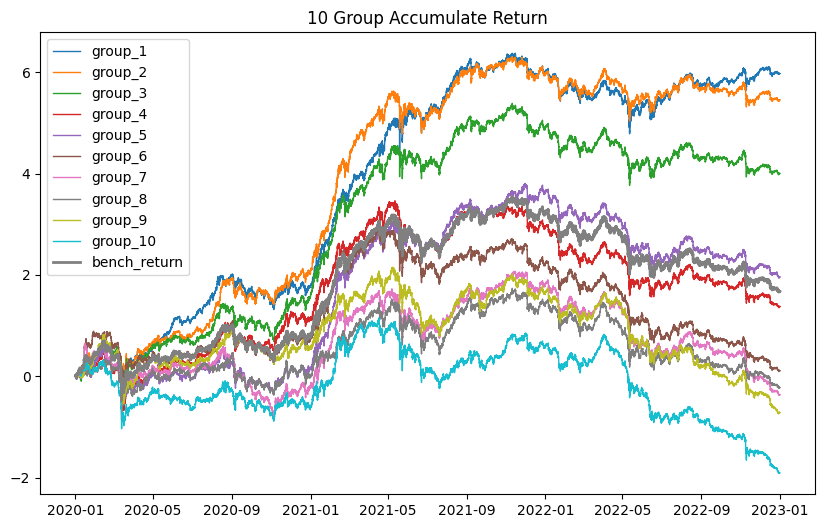

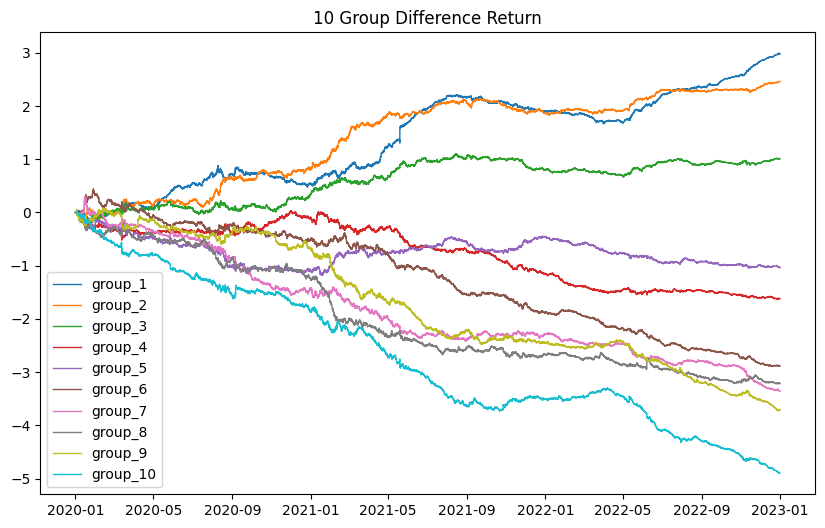

group_1: 
ann_return = 1.9893  sharpe = 1.7654  maxdd = 0.5801  calmar_ratio = 3.4292  

group_2: 
ann_return = 1.8163  sharpe = 1.5985  maxdd = 0.6319  calmar_ratio = 2.8743  

group_3: 
ann_return = 1.333  sharpe = 1.1693  maxdd = 0.6446  calmar_ratio = 2.0678  

group_4: 
ann_return = 0.4572  sharpe = 0.3971  maxdd = 0.9104  calmar_ratio = 0.5021  

group_5: 
ann_return = 0.6518  sharpe = 0.5637  maxdd = 0.7577  calmar_ratio = 0.8602  

group_6: 
ann_return = 0.0347  sharpe = 0.0301  maxdd = 0.7232  calmar_ratio = 0.0479  

group_7: 
ann_return = -0.1231  sharpe = -0.1074  maxdd = 0.8664  calmar_ratio = -0.142  

group_8: 
ann_return = -0.0748  sharpe = -0.065  maxdd = 0.8138  calmar_ratio = -0.0919  

group_9: 
ann_return = -0.2388  sharpe = -0.2085  maxdd = 0.9176  calmar_ratio = -0.2603  

group_10: 
ann_return = -0.6362  sharpe = -0.5721  maxdd = 1.4255  calmar_ratio = -0.4463  

-----------------------------------------
group_difference_1: 
ann_return = 0.9938  sharpe = 3.1473 

In [2]:
factors = df.select(['open_time', 'symbol', 'taker_buy_ratio'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()